In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/player_per_game_salary_2023.csv')
data = data.drop(columns=['Unnamed: 0', '2023/24', '2024/25', '2025/26', '2026/27', '2027/28'])

data.head()

,Player,Pos,Age,MP,FG,FGA,FG%,3P,3PA,3P%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022/23
0,Precious Achiuwa,C,23,19.2,2.7,7.1,0.380,0.4,2.2,0.161,...,20.8,0.0,0.3,0.2,0.044,-2.7,-1.3,-3.9,-0.1,2840160
1,Steven Adams,C,29,26.7,3.6,6.2,0.578,0.0,0.0,0.000,...,14.3,0.9,1.7,2.6,0.137,-0.4,0.9,0.5,0.6,17926829
2,Bam Adebayo,C,25,35.3,8.6,15.9,0.541,0.0,0.3,0.100,...,26.6,1.7,1.8,3.5,0.135,0.5,0.4,0.9,0.9,30351780
3,Ochai Agbaji,SG,22,7.9,1.0,2.6,0.386,0.3,1.4,0.217,...,15.3,0.0,0.0,0.0,0.001,-4.6,-2.9,-7.5,-0.2,3918360
4,Santi Aldama,PF,22,23.2,3.4,7.1,0.475,1.3,3.5,0.370,...,15.1,1.4,1.3,2.7,0.163,0.3,1.7,2.0,0.8,2094120


In [7]:
corr = data.corr().abs()
corr = corr.loc[corr['2022/23']>.6]
corr.index
variables = list(corr.index)

In [8]:
var_heatmap = variables.copy()
df_correlations = data[var_heatmap].corr().reset_index(level=0).rename(columns={"2022/23": "Pay"}).replace({"2022/23": "Pay"})
df_correlations = df_correlations.melt('index', var_name='Variable', value_name='Correlation')
df_correlations.to_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/chart_4_correlations.csv')

var_heatmap.insert(0, 'Player')
var_heatmap.insert(1, var_heatmap.pop(-1))
df_filter = data[var_heatmap].reset_index(drop=True).rename(columns={"2022/23": "Salary 2022/23"})

In [9]:
df_filter.to_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/chart_4_player_data.csv')

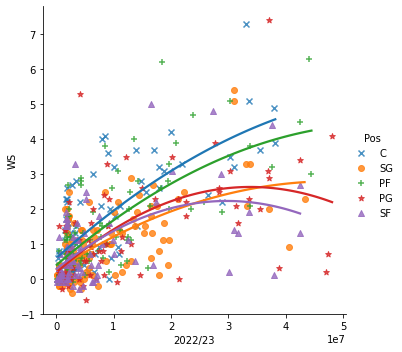

In [10]:
sns.lmplot(x="2022/23", y="WS", hue="Pos", data=data, order=2, markers=["x", "o", "+", "*", "^"], ci=None)